# Machine Learning Project #1: Carbon Footprint Calculation

## Setup

import common module, loading dataset, and grouping column

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

df = pd.read_csv('dataset.csv')
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


## EDA

In [2]:
df.describe(include='all')

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
count,10000,10000,10000,10000,10000,10000,3279,10000,10000.000000,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000,10000.000000
unique,4,2,4,4,4,3,5,3,NaN,4,NaN,4,NaN,NaN,NaN,NaN,3,16,16,NaN
top,underweight,female,pescatarian,daily,electricity,walk/bicycle,lpg,never,NaN,very frequently,NaN,small,NaN,NaN,NaN,NaN,Sometimes,[],"['Stove', 'Oven']",NaN
freq,2540,5007,2554,2546,2552,3427,697,3406,NaN,2540,NaN,2525,NaN,NaN,NaN,NaN,3463,675,670,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.875200,NaN,2031.485900,NaN,4.024600,12.139200,25.109000,11.889100,NaN,NaN,NaN,2269.147300
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.234018,NaN,2769.715597,NaN,1.990375,7.106369,14.698725,7.277218,NaN,NaN,NaN,1017.675247
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,306.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.000000,NaN,69.000000,NaN,2.000000,6.000000,13.000000,6.000000,NaN,NaN,NaN,1538.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.000000,NaN,823.000000,NaN,4.000000,12.000000,25.000000,12.000000,NaN,NaN,NaN,2080.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.000000,NaN,2516.750000,NaN,6.000000,18.000000,38.000000,18.000000,NaN,NaN,NaN,2768.000000


### Deteksi Missing Value

Terdapat beberapa data pada fitur numerikal yang bernilai 0, karena nilai ini masih memiliki arti yang masuk akal maka tidak perlu dibuang. Di sisi lain, perlu analisa lebih lanjut terkait nilai NaN pada kolom tipe kendaraan.

In [31]:
missing_count = []
for column in df.columns:
  isna = sum(df[column].isna())
  iszero = sum(df[column] == 0)
  if (isna + iszero) > 0:
    missing_count.append({'column': column, 'nan': isna, 'zero': iszero})
print(pd.DataFrame(missing_count).to_markdown())

|    | column                       |   nan |   zero |
|---:|:-----------------------------|------:|-------:|
|  0 | Vehicle Type                 |  6721 |      0 |
|  1 | Vehicle Monthly Distance Km  |     0 |     32 |
|  2 | How Long TV PC Daily Hour    |     0 |    387 |
|  3 | How Many New Clothes Monthly |     0 |    189 |
|  4 | How Long Internet Daily Hour |     0 |    432 |


Dengan melihat hubungan antara tipe kendaraan dan transportasi, dapat dilihat bahwa semua orang dengan tipe kendaraan NaN menggunakan transportasi publik atau berjalan, atau bersepeda. Karena nilai NaN memiliki arti maka tidak perlu dibuang.

In [4]:
# find transport used by people with NaN Vehicle Type
navec_transport = df[df['Vehicle Type'].isna()]['Transport'].unique()
navec_transport

array(['public', 'walk/bicycle'], dtype=object)

In [5]:
df[df['Transport'].isin(navec_transport)]['Vehicle Type'].unique()

array([nan], dtype=object)

### Deteksi Outlier

Hasil boxplot menunjukkan bahwa outlier hanya ada pada kolom jarak tempuh dan tidak ada pada kolom lainnya. Membuang nilai berdasarkan outlier pada kolom jarak tempuh berpotensi menghilangkan data penting pada kolom lainnya, sehingga tidak perlu dilakukan.

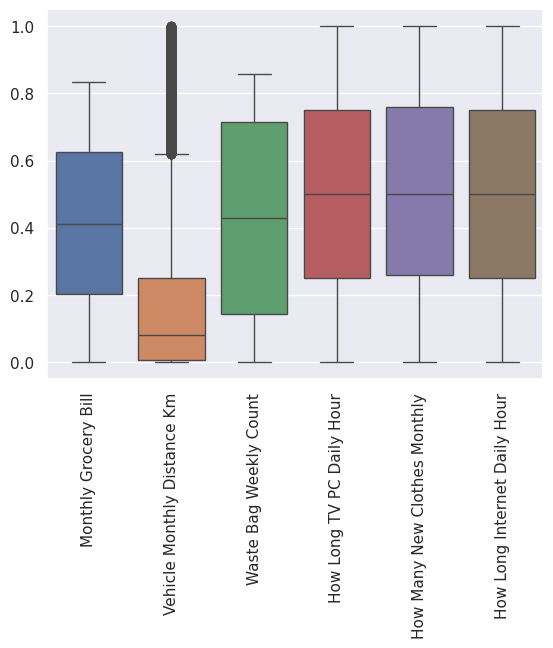

In [6]:
cols_numerical = df.describe().columns[:-1].tolist()
sns.boxplot((df[cols_numerical] - df[cols_numerical].min()) / df[cols_numerical].max())
plt.xticks(rotation=90)
plt.show()

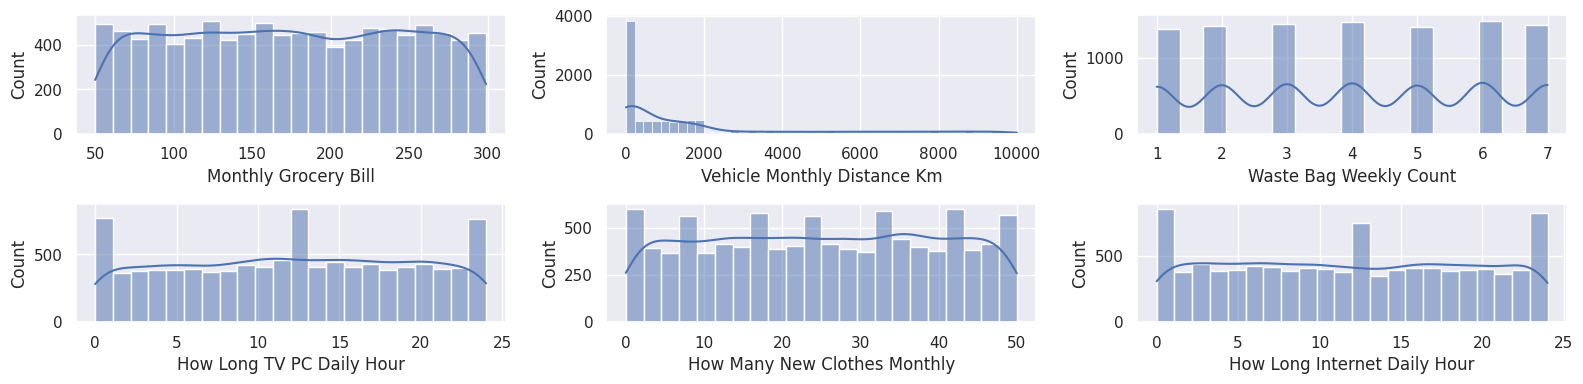

In [46]:
fig, ax = plt.subplots(2, 3, figsize=(16, 4))
for i, col in enumerate(cols_numerical):
  sns.histplot(df[col], ax=ax[i//3, i%3], kde=True)
plt.tight_layout()
plt.show()

### Pengelompokan Kolom Kategorikal

Terdapat 3 jenis kolom kategorikal pada dataset ini, yaitu:
1. Kategorikal dengan nilai ordinal (level)
2. Kategorikal dengan nilai nominal (semantik)
3. Kumpulan nilai kategorikal (array)

In [7]:
cols_categorical = df.columns[~df.columns.isin(cols_numerical)][:-1]
for col in cols_categorical:
  print(f'"{col}": {df[col].unique().tolist()}')

"Body Type": ['overweight', 'obese', 'underweight', 'normal']
"Sex": ['female', 'male']
"Diet": ['pescatarian', 'vegetarian', 'omnivore', 'vegan']
"How Often Shower": ['daily', 'less frequently', 'more frequently', 'twice a day']
"Heating Energy Source": ['coal', 'natural gas', 'wood', 'electricity']
"Transport": ['public', 'walk/bicycle', 'private']
"Vehicle Type": [nan, 'petrol', 'diesel', 'hybrid', 'lpg', 'electric']
"Social Activity": ['often', 'never', 'sometimes']
"Frequency of Traveling by Air": ['frequently', 'rarely', 'never', 'very frequently']
"Waste Bag Size": ['large', 'extra large', 'small', 'medium']
"Energy efficiency": ['No', 'Sometimes', 'Yes']
"Recycling": ["['Metal']", "['Paper', 'Plastic', 'Glass', 'Metal']", "['Paper']", "['Paper', 'Glass', 'Metal']", '[]', "['Paper', 'Plastic', 'Glass']", "['Glass']", "['Paper', 'Plastic']", "['Plastic']", "['Plastic', 'Glass', 'Metal']", "['Paper', 'Plastic', 'Metal']", "['Paper', 'Glass']", "['Paper', 'Metal']", "['Glass', 'Met

Dari daftar tersebut didapatkan:
- Kolom transport dapat dibuang karena sudah diwakili oleh tipe kendaraan.
- Kolom kategorikal dengan tingkatan: ['Body Type', 'How Often Shower', 'Social Activity', 'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency']
- Kolom kumpulan nilai kategorikal: ['Recycling', 'Cooking_With']
- Kolom bernilai nominal: sisa yang tidak disebutkan di atas

In [8]:
cols_level = ['Body Type', 'How Often Shower', 'Social Activity', 'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency']
cols_list = ['Recycling', 'Cooking_With']
cols_semantic = [col for col in cols_categorical if col not in ['Transport', *cols_level, *cols_list]]
cols_target = df.columns[-1]

print(f'numerical ({len(cols_numerical)}): {cols_numerical}')
print(f'level ({len(cols_level)}): {cols_level}')
print(f'list ({len(cols_list)}): {cols_list}')
print(f'semantic ({len(cols_semantic)}): {cols_semantic}')
print(f'target: {cols_target}')

numerical (6): ['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour']
level (6): ['Body Type', 'How Often Shower', 'Social Activity', 'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency']
list (2): ['Recycling', 'Cooking_With']
semantic (4): ['Sex', 'Diet', 'Heating Energy Source', 'Vehicle Type']
target: CarbonEmission


### Analisis Univariatif

Hasil count plot terhadap data kategori nominal menunjukkan jumlah data yang cenderung seimbang.

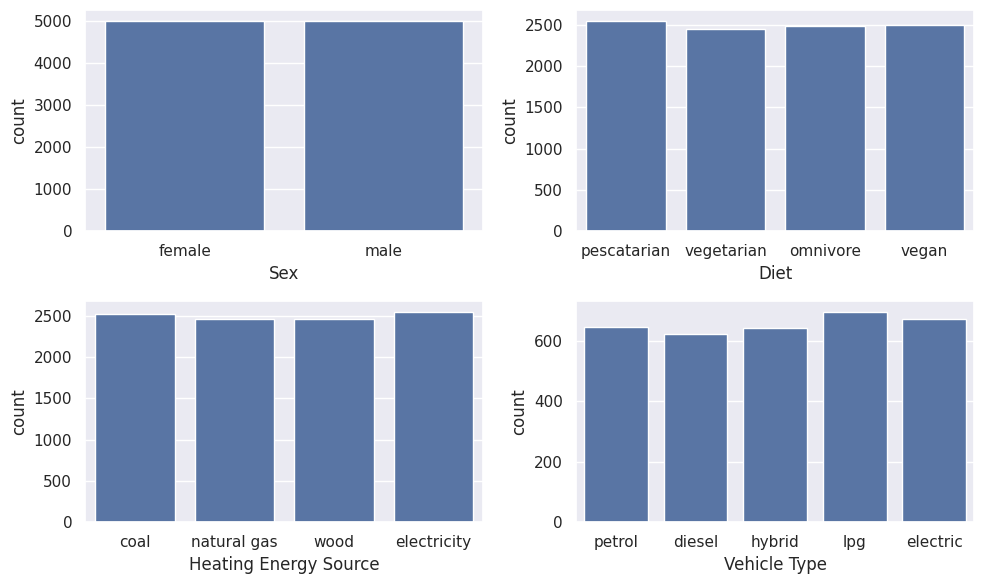

In [9]:
figure, axis = plt.subplots(2, 2, figsize=(10, 6)) 

for i, col in enumerate(cols_semantic):
  sns.countplot(df, x=col, ax=axis[i//2, i%2])
figure.tight_layout()
figure.show()

Hasil histogram menunjukkan bahwa sebagian besar karbon yang dihasilkan berada pada rentang 1000 hingga 3000. Nilai jarak tempuh kendaraan mayoritas berada pada rentang 0 hingga 2000. Fitur lain cenderung memiliki sebaran yang merata.

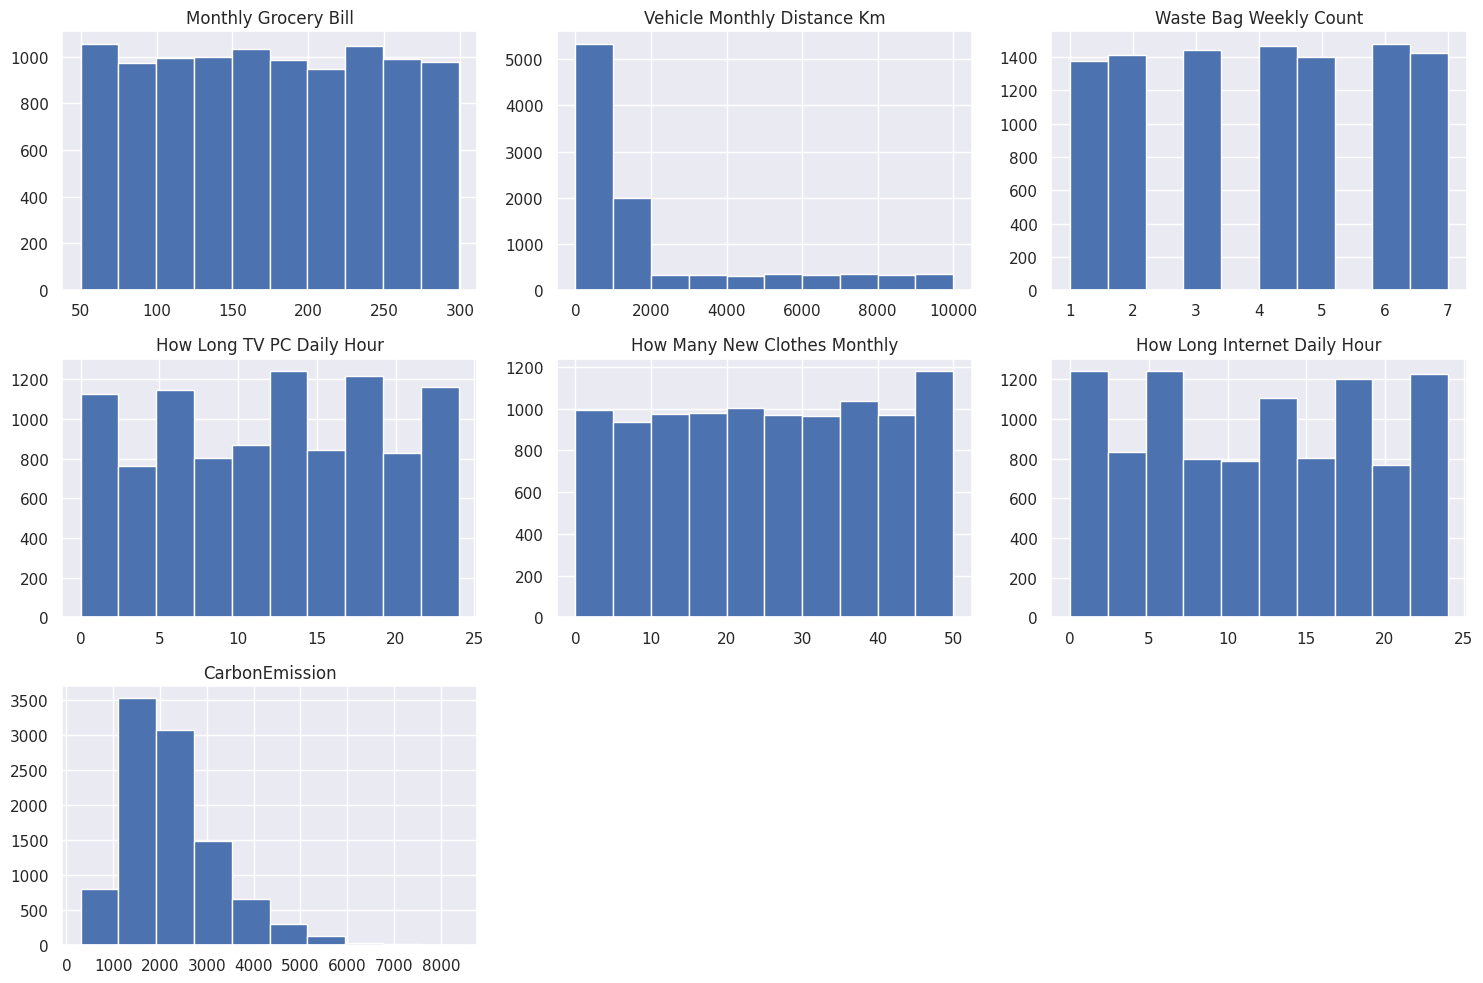

In [10]:
df[[*cols_numerical, cols_target]].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

### Analisis Multivariatif

Hasil plotting menunjukkan adanya kecenderungan korelasi positif pada semua fitur terhadap jumlah emisi yang dihasilkan. Semua fitur independen tidak berkorelasi secara signifikan dengan fitur lainnya, sehingga PCA tidak akan memberi dampak yang besar.

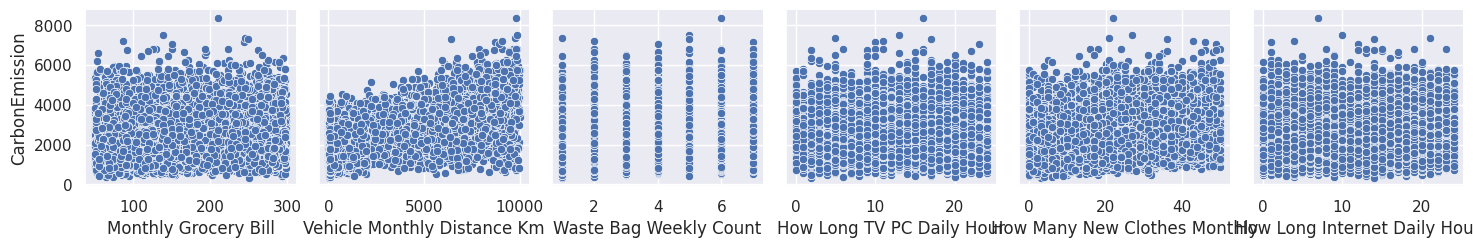

In [11]:
sns.pairplot(df, x_vars=cols_numerical, y_vars=[cols_target])
plt.show()

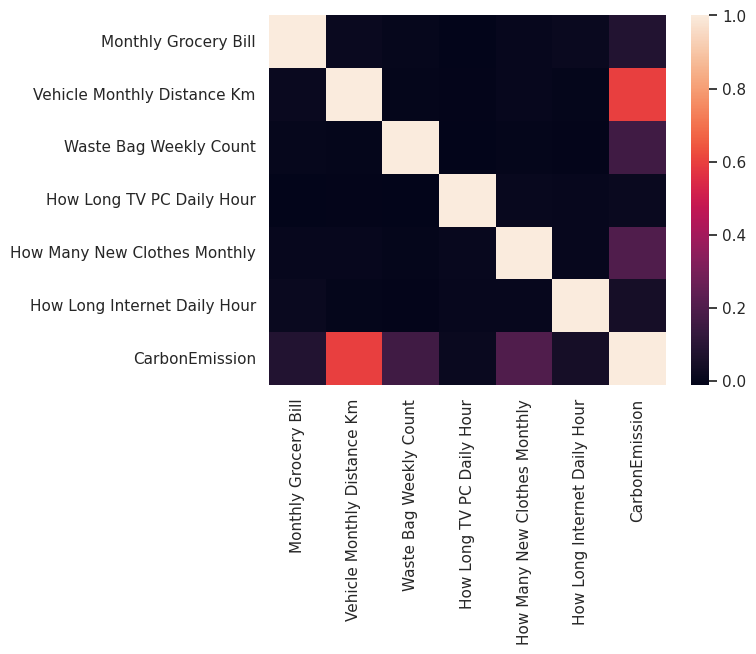

In [12]:
sns.heatmap(df[[*cols_numerical, cols_target]].corr(), annot=False)
plt.show()

## Data Preparation

### Mengubah bentuk data

Ubah data kategorikal dengan tingkatan menjadi angka antara 0 hingga jumlah data. Data diurutkan sesuai arti nominal ukuran. Terlihat terdapat hubungan yang cenderung positif pada hampir setiap fitur hasil mapping dengan emisi karbon yang dihasilkan.

Hampir semua fitur independen memiliki korelasi yang rendah dengan fitur lainnya, sehingga melakukan PCA tidak akan memberi dampak yang signifikan.

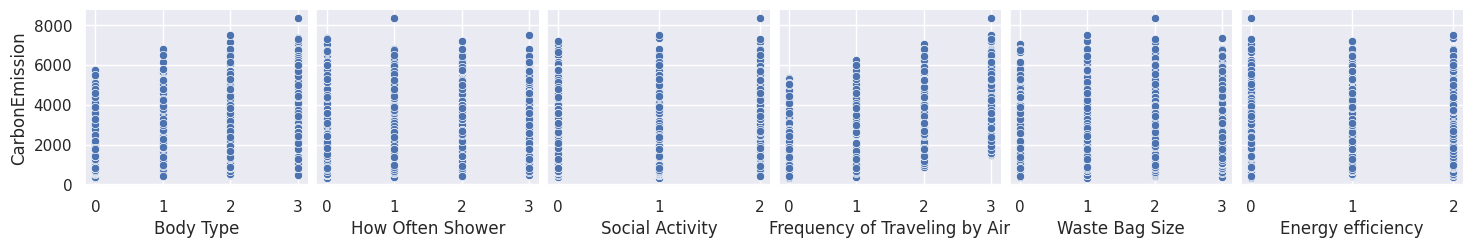

In [13]:
cols_level_dict = {
  "Body Type": ['underweight', 'normal', 'overweight', 'obese'],
  "How Often Shower": ['twice a day', 'daily', 'less frequently', 'more frequently'],
  "Social Activity": ['never', 'sometimes', 'often'],
  "Frequency of Traveling by Air": ['never', 'rarely', 'frequently', 'very frequently'],
  "Waste Bag Size": ['small', 'medium', 'large', 'extra large'],
  "Energy efficiency": ['Yes', 'Sometimes', 'No'],
}

def convert_level_category(df: pd.DataFrame, level_dict: dict[str, list[str]]):
  df = df.copy()
  for col in level_dict.keys():
    df[col] = df[col].apply(lambda x: level_dict[col].index(x))
  return df

sns.pairplot(convert_level_category(df, cols_level_dict), x_vars=cols_level, y_vars=[cols_target])
plt.show()

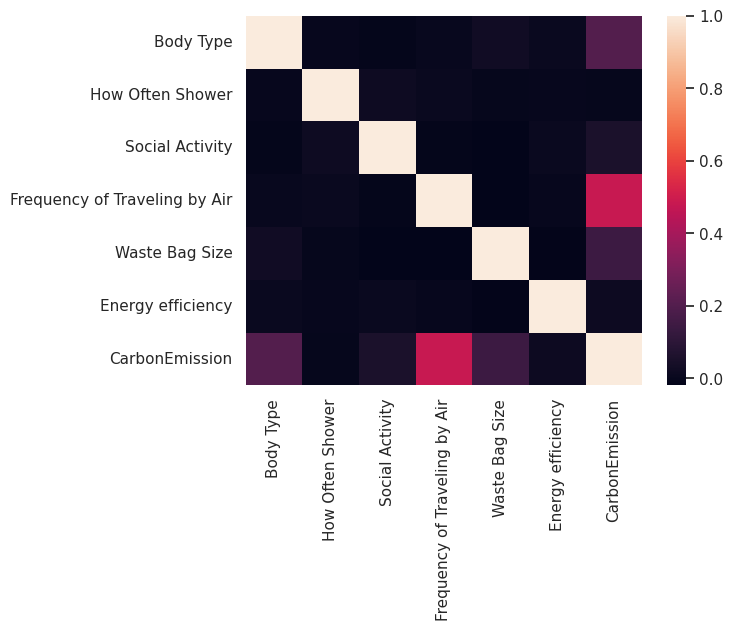

In [14]:
sns.heatmap(convert_level_category(df, cols_level_dict)[[*cols_level, cols_target]].corr(), annot=False)
plt.show()

Ubah kumpulan nilai kategorikal dari string ke list

In [15]:
import ast

def convert_list_string(df: pd.DataFrame, cols: list[str]):
  df = df.copy()
  for col in cols:
    df[col] = df[col].apply(lambda x: [i.strip().lower() for i in ast.literal_eval(x)])
  return df

Gabungkan nilai non numerik menjadi 1 fitur dalam bentuk list

In [16]:
def group_non_numerical(df: pd.DataFrame, cols: list[str], col_name='factor', remove_ex=True):
  df = df.copy()
  groups = []
  for _, row in df[cols].iterrows():
    group = []
    for i, col in enumerate(cols):
      if type(row[col]) == list:
        group.extend([f'{col}:{d}' for d in row[col]])
      else:
        group.append(f'{col}:{row[col]}')
    groups.append(group)
  if remove_ex:
    df.drop(columns=cols, inplace=True)
  df.insert(0, col_name, groups)
  return df

Terapkan semua perubahan bentuk data

In [54]:
dataset = df.drop(columns=['Transport'])
dataset = convert_level_category(dataset, cols_level_dict)
dataset = convert_list_string(dataset, cols_list)
dataset = group_non_numerical(dataset, [*cols_semantic, *cols_list])

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   factor                         10000 non-null  object
 1   Body Type                      10000 non-null  int64 
 2   How Often Shower               10000 non-null  int64 
 3   Social Activity                10000 non-null  int64 
 4   Monthly Grocery Bill           10000 non-null  int64 
 5   Frequency of Traveling by Air  10000 non-null  int64 
 6   Vehicle Monthly Distance Km    10000 non-null  int64 
 7   Waste Bag Size                 10000 non-null  int64 
 8   Waste Bag Weekly Count         10000 non-null  int64 
 9   How Long TV PC Daily Hour      10000 non-null  int64 
 10  How Many New Clothes Monthly   10000 non-null  int64 
 11  How Long Internet Daily Hour   10000 non-null  int64 
 12  Energy efficiency              10000 non-null  int64 
 13  Ca

### Pembuatan Dataset

In [18]:
from torch.utils.data import Dataset
import torch

class Tokenizer:
  def __init__(self) -> None:
    self.dictionary = ['<pad>', '<nil>']
    
  def fit(self, datas):
    dictionary = set()
    for data in datas:
      dictionary.update(data)
    self.dictionary.extend(list(dictionary))
    
  def size(self):
    return len(self.dictionary)
  
  def tokenize(self, data):
    max_len = self.size()
    _d = [self.dictionary.index(d) if d in self.dictionary else 1 for d in data]
    _d = [*_d, *([0]*(max_len-len(_d)))] # apply padding
    return np.array(_d)

class CarbonDataset(Dataset):
  def __init__(self, x, y, tokenizer: Tokenizer, factor_col_idx=0) -> None:
    super().__init__()
    self.x = x
    self.y = y
    self.factor_col_idx = factor_col_idx
    self.tokenizer = tokenizer
    
  def __len__(self):
    return len(self.y)
  
  def __getitem__(self, index):
    x = self.x[index]
    y = self.y[index]
    return (
      torch.tensor(self.tokenizer.tokenize(x[self.factor_col_idx])),
      torch.tensor(x[self.factor_col_idx+1:].astype(float)),
      torch.tensor(y, dtype=torch.float32)
    )

Membagi dataset menjadi data latih dan data uji

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = dataset[cols_target].to_numpy()
x = dataset.drop(columns=[cols_target]).values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2)

feature_scaler = MinMaxScaler()
feature_scaler.fit(X_train[:,1:])
X_train[:,1:] = feature_scaler.transform(X_train[:,1:])
X_test[:,1:] = feature_scaler.transform(X_test[:,1:])

target_scaler = MinMaxScaler()
target_scaler.fit(y_train.reshape(-1, 1))
y_train = target_scaler.transform(y_train.reshape(-1, 1))
y_test = target_scaler.transform(y_test.reshape(-1, 1))

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 13) (2000, 13) (8000, 1) (2000, 1)


Membuat dataloader dan tokenizer

In [20]:
from torch.utils.data import DataLoader

BATCH_SIZE = 16

tokenizer = Tokenizer()
tokenizer.fit(X_train[:, 0])

train_loader = DataLoader(CarbonDataset(X_train, y_train, tokenizer), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(CarbonDataset(X_test, y_test, tokenizer), shuffle=False)

## Modeling

### Pembuatan model

Model yang dibuat adalah MLP (multi layer perceptron) dengan embedding untuk mengekstrak data nominal

In [21]:
import torch
from torch import nn

class CarbonModel(nn.Module):
  def __init__(self, num_embeddings, embedding_dim=2, features=13) -> None:
    super().__init__()
    
    self.tokenizer = tokenizer
    self.embedding = nn.Embedding(num_embeddings, embedding_dim, padding_idx=0)
    self.mlp = nn.Sequential(
      nn.Linear(features+embedding_dim-1, 9),
      nn.ReLU(),
      nn.Linear(9, 4),
      nn.ReLU(),
      nn.Linear(4, 1)
    )
    
  def forward(self, token, x):
    x1 = self.embedding(token)
    x1 = torch.mean(x1, 1)
    x = torch.cat((x1, x), 1).type(torch.float32)
    x = self.mlp(x)
    return x

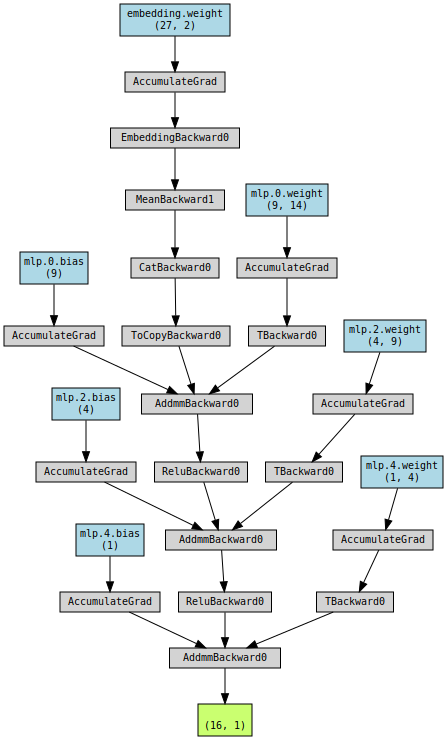

In [69]:
from torchviz import make_dot

for t, x, y in train_loader:
  mdoel = CarbonModel(2)
  y = model(t, x)
  model_dot = make_dot(y, params=dict(model.named_parameters()))
  break
model_dot

### Training Model

In [82]:
def train(model, dataloader, optimizer, loss_fn):
  losses = []
  model.train(True)
  for t, x, y in dataloader:
    optimizer.zero_grad()
    
    preds = model(t, x)
    loss = loss_fn(preds, y)
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.item())
  
  return sum(losses)/len(losses)
    
def validate(model, dataloader, metric):
  losses = []
  model.eval()
  with torch.no_grad():
    for t, x, y in dataloader:
      preds = model(t, x)
      losses.append(metric(preds, y).item())
  return sum(losses)/len(losses)

Percobaan dilakukan dengan 3 model yang sama menggunakan konfigurasi hyperparameter yang sama pula dengan perbedaan pada penggunaan fungsi loss sebagai berikut:
- dengan MSE loss
- dengan MAE loss
- dengan MSE + MAE loss

Dengan rincian persamaan fungsi loss sebagai berikut:

$$\begin{align}
MSE(Y, \hat{Y}) &= \frac{1}{n} \sum^n_{i=1}(Y_i-\hat{Y_i})^2 \\
MAE(Y, \hat{Y}) &= \frac{1}{n} \sum^n_{i=1}|Y_i-\hat{Y_i}| \\
f_{mse+mae}(Y, \hat{Y}) &= MSE(Y, \hat{Y}) + MAE(Y, \hat{Y})
\end{align}$$

In [94]:
from tqdm import tqdm
import copy

def train_model(model, loss_fn, name):
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.8)
  
  train_losses = []
  val_losses = []
  lowest_loss = float('inf')
  early_stop_count = 6
  stop_counter = 0

  for epoch in (pbar := tqdm(range(300))):
    train_loss = train(model, train_loader, optimizer, loss_fn)
    val_loss = validate(model, val_loader, loss_fn)
    
    scheduler.step()
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    if val_loss > lowest_loss:
      if stop_counter == early_stop_count:
        print('stopped early at epoch', epoch)
        break
      stop_counter += 1
    else:
      lowest_loss = val_loss
      stop_counter = 0
    
    pbar.set_postfix(train_loss=train_loss, val_loss=val_loss)
  
  print('done training', name)
  return train_losses, val_losses

model_mse = CarbonModel(tokenizer.size(), 2)
model_mae = copy.deepcopy(model_mse)
model_mse_mae = copy.deepcopy(model_mse)

loss_fn = lambda pred, target: nn.functional.l1_loss(pred, target) + nn.functional.mse_loss(pred, target)

mse_hist = train_model(model_mse, nn.functional.mse_loss, 'model-mse')
mae_hist = train_model(model_mae, nn.functional.l1_loss, 'model-mae')
mse_mae_hist = train_model(model_mse_mae, loss_fn, 'model-mse-mae')

  0%|          | 0/300 [00:00<?, ?it/s]

100%|██████████| 300/300 [06:28<00:00,  1.30s/it, train_loss=0.000279, val_loss=0.000345]


done training model-mse


 43%|████▎     | 130/300 [02:51<03:44,  1.32s/it, train_loss=0.0131, val_loss=0.0141]


stopped early at epoch 130
done training model-mae


 31%|███▏      | 94/300 [02:12<04:50,  1.41s/it, train_loss=0.0144, val_loss=0.0159]

stopped early at epoch 94
done training model-mse-mae


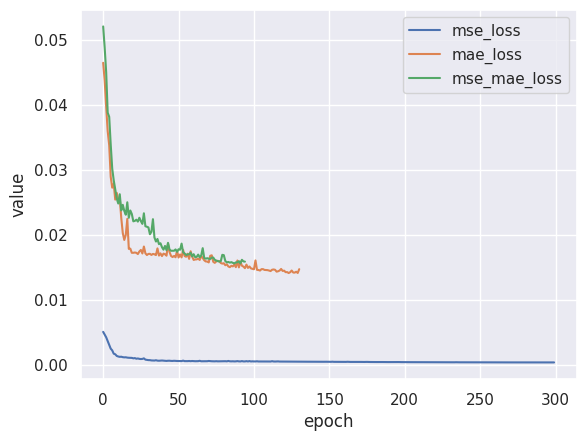

In [97]:
plt.plot(mse_hist[1], label='mse_loss')
plt.plot(mae_hist[1], label='mae_loss')
plt.plot(mse_mae_hist[1], label='mse_mae_loss')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

## Evaluasi

Perhitungan metrik MSE, MAE, RMSE, dan melihat apakah sudah hasil sudah berada pada 2% rentang data

In [100]:
def evaluate(model, target_mae, name):
  print('Score', name)
  mae = validate(model, val_loader, nn.L1Loss())
  mse = validate(model, val_loader, nn.MSELoss())

  print(f'MSE: {mse:.4f}, RMSE: {mse**.5:.4f}, MAE: {mae:.4f}')
  print(f'Target {"aquired" if mae < target_mae else "not aquired"} by {(mae - target_mae) / target_mae * 100:.2f}%\n')
  
  return (model, name, mae)
  
target_mae = (y_test.max() - y_test.min()) * .02 # 2% of data scale
print(f'Target MAE: {target_mae}\n')

model_results = []
model_results.append(evaluate(model_mse, target_mae, 'model with mse loss'))
model_results.append(evaluate(model_mae, target_mae, 'model with mae loss'))
model_results.append(evaluate(model_mse_mae, target_mae, 'model with mse and mae loss'))

model_results.sort(key=lambda x: x[2])
best_model = model_results[0]

print('Best:', best_model[1])

Target MAE: 0.017455044955044956

Score model with mse loss
MSE: 0.0003, RMSE: 0.0186, MAE: 0.0136
Target aquired by -22.04%

Score model with mae loss
MSE: 0.0004, RMSE: 0.0198, MAE: 0.0147
Target aquired by -15.83%

Score model with mse and mae loss
MSE: 0.0004, RMSE: 0.0211, MAE: 0.0154
Target aquired by -11.76%

Best: model with mse loss


Ploting sebaran fitur data nominal berdasarkan embedding

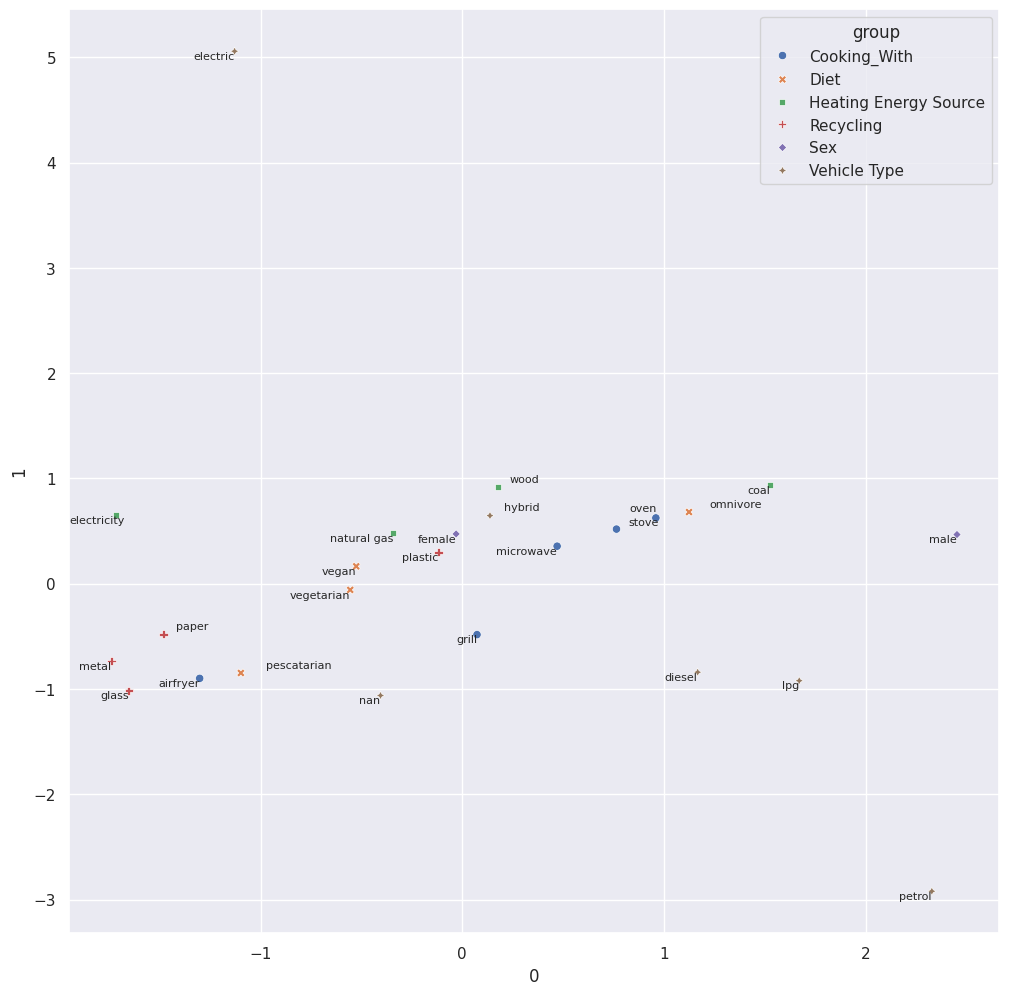

In [98]:
from adjustText import adjust_text

model = best_model[0]

factor_score = []
for token, score in zip(tokenizer.dictionary, model.embedding.weight):
  if token in ('<nil>', '<pad>'):
    continue
  for i, s in enumerate(score):
    factor_score.append([token, s.item(), i])
    
# factor_score = sorted(factor_score)
factor_score = pd.DataFrame(factor_score, columns=['factor', 'score', 'index'])
factor_score = factor_score.pivot(index='factor', columns='index', values='score')
factor_rank = factor_score.reset_index()
factor_rank['group'] = factor_rank['factor'].map(lambda x: x.split(':')[0])
factor_rank['factor'] = factor_rank['factor'].map(lambda x: x.split(':')[1])

plt.figure(figsize=(12, 12))
plot = sns.scatterplot(factor_rank, x=0, y=1, style='group', hue='group')

annot = []
for f, x, y in factor_rank[['factor', 0, 1]].values:
  annot.append(plot.annotate(f, (x, y), fontsize=8))
adjust_text(annot)

plt.show()